In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics 
import statsmodels.formula.api as smf
import math
import statsmodels.api as sm


In [3]:
# load training data 
df = pd.read_csv(r'/Users/Anna/Dropbox (Penn)/Fall 2022/CIS 5200/Final Project/data/train.csv')

In [17]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [14]:
len(df)

9917530

In [9]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

399344

In [53]:
df['position'].unique()

array([27, 26, 21, 34,  4,  7, 18, 35,  3, 10, 20, 19, 13,  2, 15, 31, 23,
       36,  8,  6, 28,  1, 32, 12, 24, 37, 33, 29, 22,  9, 25, 30, 14, 16,
       17,  5, 11, 38, 39, 40])

In [5]:
df['date_time'].unique()

array(['2013-04-04 08:32:15', '2012-12-31 08:59:22',
       '2013-06-05 12:27:51', ..., '2013-03-12 15:51:20',
       '2013-03-30 16:39:40', '2013-05-21 11:06:37'], dtype=object)

In [7]:
df['click_bool'].describe()

count    9.917530e+06
mean     4.473614e-02
std      2.067240e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: click_bool, dtype: float64

In [10]:
df['booking_bool'].describe()

count    9.917530e+06
mean     2.788930e-02
std      1.646557e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: booking_bool, dtype: float64

In [18]:
df['visitor_hist_starrating'].describe()

count    505297.000000
mean          3.374634
std           0.692218
min           1.000000
25%           2.920000
50%           3.440000
75%           3.940000
max           5.000000
Name: visitor_hist_starrating, dtype: float64

In [13]:
# calculate the average treatment effect as a whole
# random_bool = 0 normal sorting, = 1 random sorting
smf.ols('click_bool ~ random_bool', data=df).fit().summary().tables[1]

# when the sorting is random, consumers are more likely to click???

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0440,7.83e-05,561.683,0.000,0.044,0.044
random_bool,0.0026,0.000,18.323,0.000,0.002,0.003


In [50]:
smf.ols('booking_bool ~ random_bool', data=df).fit().summary().tables[1]

# when the sorting is random, users are less likley to book the hotel 

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0374,6.21e-05,601.863,0.000,0.037,0.037
random_bool,-0.0320,0.000,-280.410,0.000,-0.032,-0.032


In [21]:
# treatment effect by user's historical ratings
df_5 = df[df['visitor_hist_starrating'] == 5]
df_4 = df[df['visitor_hist_starrating'] == 4]
df_3 = df[df['visitor_hist_starrating'] == 3]
df_2 = df[df['visitor_hist_starrating'] == 2]
df_1 = df[df['visitor_hist_starrating'] == 1]

In [26]:
print(len(df_5))
print(len(df_4))
print(len(df_3))
print(len(df_2))
print(len(df_1))

9117
47756
42316
18166
119


Text(0.5, 0, "Vistor's Historical Ratings")

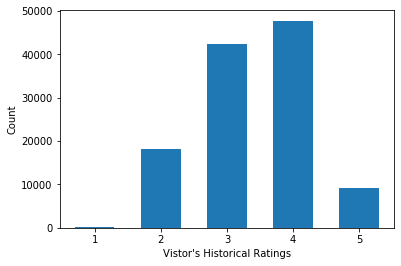

In [35]:
# plot histograph for historical ratings 
y = [119, 18166, 42316, 47756, 9117]
x = ["1", "2", "3", "4", "5"]
plt.bar(x, y, width = 0.6)
plt.ylabel("Count")
plt.xlabel("Vistor's Historical Ratings")

In [40]:
print("average treatment effect for 5 starting rating users:")
print(smf.ols('click_bool ~ random_bool', data=df_5).fit().summary().tables[1])
print("average treatment effect for 4 starting rating users:")
print(smf.ols('click_bool ~ random_bool', data=df_4).fit().summary().tables[1])
print("average treatment effect for 3 starting rating users:")
print(smf.ols('click_bool ~ random_bool', data=df_3).fit().summary().tables[1])
print("average treatment effect for 2 starting rating users:")
print(smf.ols('click_bool ~ random_bool', data=df_2).fit().summary().tables[1])
print("average treatment effect for 1 starting rating users:")
print(smf.ols('click_bool ~ random_bool', data=df_1).fit().summary().tables[1])

# 2 observations:
# first, when calcuate the ATE by groups, results become no longer statistically significant
# second, the treatment has the largest effect for high star rating users; for low star rating users, the treatment effect is even negative

average treatment effect for 5 starting rating users:
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0452      0.002     19.022      0.000       0.040       0.050
random_bool     0.0072      0.006      1.144      0.253      -0.005       0.020
average treatment effect for 4 starting rating users:
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0439      0.001     42.678      0.000       0.042       0.046
random_bool     0.0009      0.003      0.345      0.730      -0.004       0.006
average treatment effect for 3 starting rating users:
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0449      0.001     

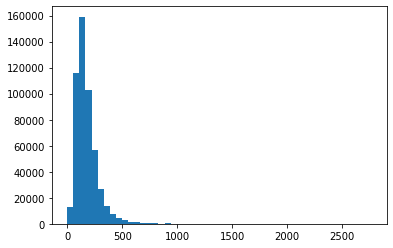

In [44]:
plt.hist(df['visitor_hist_adr_usd'], bins=50)
plt.show()

In [45]:
df['visitor_hist_adr_usd'].describe()

count    507612.000000
mean        176.588512
std         108.434842
min           0.000000
25%         110.330000
50%         151.830000
75%         214.350000
max        2768.930000
Name: visitor_hist_adr_usd, dtype: float64

In [46]:
# treatment effect by user's historical spendings
df_low = df[df['visitor_hist_adr_usd'] <= 100]
df_lowm = df[(df['visitor_hist_adr_usd'] > 100) & (df['visitor_hist_adr_usd'] <= 200)]
df_medium = df[(df['visitor_hist_adr_usd'] > 200) & (df['visitor_hist_adr_usd'] <= 300)]
df_mhigh = df[(df['visitor_hist_adr_usd'] > 300) & (df['visitor_hist_adr_usd'] <= 400)]
df_high = df[df['visitor_hist_adr_usd'] >= 400]

In [48]:
print("average treatment effect for high spending users:")
print(smf.ols('click_bool ~ random_bool', data=df_high).fit().summary().tables[1])
print("average treatment effect for medium-high spending users:")
print(smf.ols('click_bool ~ random_bool', data=df_mhigh).fit().summary().tables[1])
print("average treatment effect for medium spending users:")
print(smf.ols('click_bool ~ random_bool', data=df_medium).fit().summary().tables[1])
print("average treatment effect for medium-low spending users:")
print(smf.ols('click_bool ~ random_bool', data=df_lowm).fit().summary().tables[1])
print("average treatment effect for low spending users:")
print(smf.ols('click_bool ~ random_bool', data=df_low).fit().summary().tables[1])

average treatment effect for high spending users:
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0455      0.002     26.624      0.000       0.042       0.049
random_bool     0.0129      0.005      2.776      0.006       0.004       0.022
average treatment effect for medium-high spending users:
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0442      0.001     34.201      0.000       0.042       0.047
random_bool     0.0063      0.003      1.856      0.063      -0.000       0.013
average treatment effect for medium spending users:
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0435      0.001     61.

In [49]:
df['prop_country_id'].unique()

array([219, 100, 158,  31, 216,  15,  98,  55,  30, 137, 215, 117,  56,
       129,  99,  53, 181, 221,  35,  59, 202, 132, 127, 109, 195, 131,
        70, 220,  13,  92,  91, 113, 205,  14,  41, 154, 164,   9, 138,
       194, 103,  81,  50,   4, 102, 106,  60,  73,  26,  16, 225,  39,
        23, 230, 178,  32, 212, 125, 157, 145, 203, 185,  88, 151,  71,
        10,  80,  68,  33,  77, 134, 152,  61, 153, 159,  18, 182,  63,
        48, 119, 206, 156, 173, 223,  97, 123,   2, 211, 184,  86, 213,
        40,  83, 187,  37, 189, 197,  21,  20,  17,  45,  42,  74, 229,
        47, 224, 112, 200, 149,  27, 122, 162,  93,  69,  34, 190,  96,
       161,  11,  76,  90, 186,  38, 155, 141, 196, 163, 226, 124, 172,
        51, 214, 177, 201,  22, 167, 169, 171,  65, 179, 143, 146,  72,
       136, 128,  82, 120, 111,  19, 160,  25, 217, 192,  57, 208, 222,
        44, 165, 180,  89, 204, 140,   1,  87,  62, 207,  46,   7,  79,
       108, 135, 126])